#Challenge

In [ ]:
#import sys
#!{sys.executable} -m pip install <package list>

In [ ]:
# Mendownload pre-trained model.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-21 14:34:38--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   207MB/s    in 0.4s    

2022-06-21 14:34:39 (207 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set weights.
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Inisialisasi model pre-trained .
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Memuat model pre-trained.
pre_trained_model.load_weights(local_weights_file)

# Membuat bobot/weight dari layer model tidak bisa ditrain.
for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
# Memilih 'mixed8' sebagai layer terakhir dari model pre-trained yang akan digunakan.
last_layer = pre_trained_model.get_layer('mixed8')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 1280)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten layer terakhir dari model pre-trained.
x = layers.Flatten()(last_output)
# Penambahan layer untuk model versi kita.
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)   
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)                
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

# Print model summary.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
# Menyetel parameter model untuk training
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop

# Compile model dengan Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt, loss="binary_crossentropy", metrics = ["accuracy"])


"\nmodel.compile(optimizer = RMSprop(learning_rate=0.0001), \n              loss = 'binary_crossentropy', \n              metrics = ['accuracy'])\n"

In [ ]:
import sys
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install shutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [ ]:
import pandas as pd
import os
from shutil import unpack_archive
pd.set_option("display.max_columns", 101)

## Dataset

In [ ]:
# Run this cell block to download and extract image data
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/5460fcc87e2d7f7e19c17f719e0df00a/train_1.zip'

print('Extracting Train Dataset : Label 1')
unpack_archive('train_1.zip', '')

print('Extracting Train Dataset : Label 0')
unpack_archive('train_0.zip', '')

print('Extracting Test Dataset')
unpack_archive('test.zip', '')

print('Dataset Extracted')


os.remove('train_1.zip')
os.remove('train_0.zip')
os.remove('test.zip')
print('Extra Files Removed')

--2022-06-21 14:35:23--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 54.231.227.97
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|54.231.227.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58948996 (56M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]  56.22M  30.7MB/s    in 1.8s    

2022-06-21 14:35:25 (30.7 MB/s) - ‘test.zip’ saved [58948996/58948996]

--2022-06-21 14:35:25--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.217.142.169
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.217.142.169|:443... co

## Data Description

Column | Description
:---|:---
`file` | Image name
`label` | Target Label (1/0)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive')

print(tf.__version__)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2.8.2


In [ ]:
train_0_dir = os.path.join('/content/train/0')
train_1_dir = os.path.join('/content/train/1')
test_dir = os.path.join('/content/test')

train_0_data = os.listdir(train_0_dir)
train_1_data = os.listdir(train_1_dir)
test_data = os.listdir(test_dir)

print(train_0_data[:10])
print(train_1_data[:10])
print(test_data[:10])

print("\nTotal images of train 0:", len(train_0_data))
print("Total images of train 1:", len(train_1_data))
print("Total images of test:", len(test_data))

['img_5264.jpg', 'img_64443.jpg', 'img_63151.jpg', 'img_68798.jpg', 'img_14715.jpg', 'img_70465.jpg', 'img_13668.jpg', 'img_4768.jpg', 'img_70729.jpg', 'img_9422.jpg']
['img_55108.jpg', 'img_31885.jpg', 'img_35327.jpg', 'img_1617.jpg', 'img_78675.jpg', 'img_101223.jpg', 'img_61593.jpg', 'img_29232.jpg', 'img_22712.jpg', 'img_42144.jpg']
['img_64030.jpg', 'img_60142.jpg', 'img_11658.jpg', 'img_49198.jpg', 'img_12773.jpg', 'img_98917.jpg', 'img_60551.jpg', 'img_74763.jpg', 'img_26926.jpg', 'img_42132.jpg']

Total images of train 0: 2026
Total images of train 1: 1989
Total images of test: 1401


(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


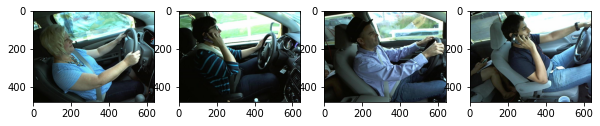

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
src_path = "/content/test/"
sub_class = os.listdir(src_path)

fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:4])):
    plt.subplot(2,4,e+1)
    img = plt.imread(os.path.join(src_path,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    print(img.shape)

## Machine Learning

Build a neural network that can classify the driver’s behaviour.
- **The model's performance will be evaluated on the basis of accuracy.**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True
callback = myCallback()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up Data generator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode="nearest",
      validation_split=0.20)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Preprocess Data

train_generator = train_datagen.flow_from_directory(
    directory="/content/train/",
    target_size=(150, 150),
    batch_size=8,
    class_mode="binary",
    subset='training',
    shuffle=True,
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    directory="/content/train/",
    target_size=(150, 150),
    batch_size=8,
    class_mode="binary",
    subset='validation',
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    '.', classes=['test']
)

Found 3213 images belonging to 2 classes.
Found 802 images belonging to 2 classes.
Found 1400 images belonging to 1 classes.


In [ ]:
# Fit model

history = model.fit(
    train_generator, 
    validation_data = validation_generator,
    epochs=100, 
    steps_per_epoch = 8,
    validation_steps = 8,
    verbose = 1,
    callbacks = [callback])

Epoch 1/100
8/8 [==============================] - 2s 341ms/step - loss: 0.9622 - accuracy: 0.5469 - val_loss: 0.6803 - val_accuracy: 0.6094
Epoch 2/100
8/8 [==============================] - 1s 192ms/step - loss: 0.7605 - accuracy: 0.5312 - val_loss: 0.6253 - val_accuracy: 0.6562
Epoch 3/100
8/8 [==============================] - 1s 189ms/step - loss: 0.7612 - accuracy: 0.4531 - val_loss: 0.6205 - val_accuracy: 0.6719
Epoch 4/100
8/8 [==============================] - 1s 194ms/step - loss: 0.7020 - accuracy: 0.5625 - val_loss: 0.6262 - val_accuracy: 0.6875
Epoch 5/100
8/8 [==============================] - 1s 192ms/step - loss: 0.7241 - accuracy: 0.5625 - val_loss: 0.6468 - val_accuracy: 0.5938
Epoch 6/100
8/8 [==============================] - 1s 194ms/step - loss: 0.7577 - accuracy: 0.5469 - val_loss: 0.6071 - val_accuracy: 0.6719
Epoch 7/100
8/8 [==============================] - 1s 195ms/step - loss: 0.6487 - accuracy: 0.6719 - val_loss: 0.5577 - val_accuracy: 0.7031
Epoch 8/100
8

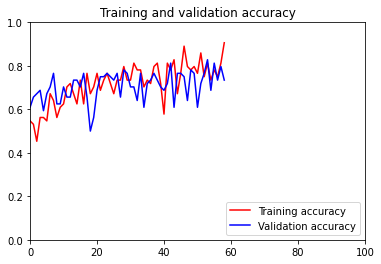

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.ylim([0, 1])
plt.xlim([0, 100])
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#evaluasi model
score = model.evaluate(validation_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

101/101 [==============================] - 8s 81ms/step - loss: 0.4472 - accuracy: 0.7930
Test loss: 0.4471546411514282
Test accuracy: 0.7930174469947815


In [ ]:
#Simpan model
model.save("model.h5")

In [ ]:
#Prediksi model dan menyimpan hasilnya dalam sebuah list 'pred_class'.
import numpy as np
from google.colab import files
from keras.preprocessing import image

pred_class = []
for fn in test_data:

  try:
    path = '/content/test/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = x / 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=8)
    #print(classes[0])
    if classes[0]>0.5:
      #print(fn + " is a class 1")
      pred_class.append("1")
    else:
      #print(fn + " is a class 0")
      pred_class.append("0")
  except:
    pass

print(pred_class)

['1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0',

In [ ]:
print(len(pred_class))

1400


> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each image in the test folder, predict the value of the label (0/1). You should submit a CSV file with a header row and one row per test entry. 

The file (`submissions.csv`) should have exactly 2 columns:
   - **file**
   - **label**
   

In [ ]:
submission_df = pd.DataFrame (pred_class, columns = ['label predicted'])
print(submission_df)

     label predicted
0                  1
1                  0
2                  1
3                  0
4                  1
...              ...
1395               0
1396               0
1397               0
1398               0
1399               1

[1400 rows x 1 columns]


In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)